# CALCULOS DE MAWOP DE UN POZO

In [643]:
# Importamos las librerias necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from IPython.display import clear_output
from PIL import Image
from PIL import Image
import os

import warnings
warnings.filterwarnings("ignore")

plt.style.use('ggplot')
%matplotlib inline

In [644]:
# Configuramos el directorio raiz
path = "C:/Users/diego/Documents/Halliburton/Proyectos/Integridad/"
os.chdir(path)

# 1. Lectura De Parametros Del Pozo

In [645]:
# Creamos un dataframe de la informacion del estado mecanico

# Tabla de datos de tubulares
#          Tubular                     Descripcion       Profundidad  Yield    Colapso  Tope De Cemento"     
Tabla = [["Tubing"              , '2 7/8" - 6.5# - L80'    ,9000      ,10570  ,11160    ,"NA" ],
         ["Casing de Produccion", '5 1/2" - 17# - P110'    ,10000     ,10640  ,7480     ,4000 ],
         ["Casing Intermedio 1" , '10 3/4" - 55.5# - P110' ,5000      ,8860   ,5950     ,1200 ],
         ["Casing Intermedio 2 ", '13 3/8" - 68# - K55'    ,1000      ,3450   ,1950     ,0    ],
         ["Casing de Superficie", '18 5/8" - 87.5# - K55'  ,500       ,2250   ,630      ,0    ]
        ]

Tubulares = pd.DataFrame(Tabla,columns=["Tubular","Descripcion","Profundidad","Yield","Colapso","Tope De Cemento"],dtype=float)
Tubulares=Tubulares.set_index('Tubular')

# Densidades y presiones en los anulares
#          Tubular    Densidad Presion
Tabla = [["Tubing",     2.6,     500    ],
         ["Anular A",   13.0,    240    ], 
         ["Anular B",   12.0,     0     ],
         ["Anular C",   10.0,     0     ],
         ["Anular D",    9.0,     0     ]
        ]

Anulares = pd.DataFrame(Tabla,columns=["Anular","Densidad De Fluido","Presion En Superficie"],dtype=float)
Anulares=Anulares.set_index('Anular')

# Caracteristicas del packer
Packer = {"Profundidad":9000,
          "Rating":10000
         }

# Profundidad y Densidad de Fractura de zona expuesta
#          Profundidad   Densidad
Tabla = [[    1000,        19.5     ]]

Formaciones_Expuestas = pd.DataFrame(Tabla,columns=["Profundidad","Gradiente"],dtype=float)

# Informacion del rating de presion del Cabezal
Pw = 5000

# Crearemos una lista de la evaluacion de MAWOP por elemento:
MAWOP = []

In [646]:
Tubulares

,Descripcion,Profundidad,Yield,Colapso,Tope De Cemento
Tubular,,,,,
Tubing,"2 7/8"" - 6.5# - L80",9000.0,10570.0,11160.0,NA
Casing de Produccion,"5 1/2"" - 17# - P110",10000.0,10640.0,7480.0,4000
Casing Intermedio 1,"10 3/4"" - 55.5# - P110",5000.0,8860.0,5950.0,1200
Casing Intermedio 2,"13 3/8"" - 68# - K55",1000.0,3450.0,1950.0,0
Casing de Superficie,"18 5/8"" - 87.5# - K55",500.0,2250.0,630.0,0


In [647]:
Anulares

,Densidad De Fluido,Presion En Superficie
Anular,,
Tubing,2.6,500.0
Anular A,13.0,240.0
Anular B,12.0,0.0
Anular C,10.0,0.0
Anular D,9.0,0.0


In [648]:
# Evaluamos si hay formaciones expuestas en las secciones de hueco

# Creamos la columna de Formacion Expuesta
Tubulares["Formacion Expuesta"] = "NO"

# Asignamos NA al Tubing, que no tiene formacion expuesta
Tubulares["Formacion Expuesta"][0] = "NA"

# Realizamos el calculo desde la fila # 2
for fila in range(1,len(Tubulares)):
    
    # Evitamos los calculos cuando no haya tope de cemento
    if Tubulares["Tope De Cemento"][fila-1] != "NA":
        
        # Evaluamos si la profundidad del revestimiento esta mas arriba (es menor) que el tope del cemento del la siguiente seccion
        if Tubulares["Profundidad"][fila] < Tubulares["Tope De Cemento"][fila-1]:
            
            # Asignamos el valor de SI, para los revestimientos que no tienen cubierto totalmente su profundidad
            Tubulares["Formacion Expuesta"][fila-1] = "SI"

In [649]:
# Asignaremos los datos de las formaciones expuestas

# Creamos la columna de Formacion Expuesta
Tubulares["Profundidad Zona Expuesta"] = "NA"
Tubulares["Gradiente Fractura"] = "NA"


# Realizamos el calculo desde la fila # 2 en el dataframe de tubulares, evitando el dato de Tubing
for fila_tub in range(1,len(Tubulares)):
    if Tubulares["Formacion Expuesta"][fila_tub]=="SI":
        for fila_for in range(len(Formaciones_Expuestas)):            
            if ((Formaciones_Expuestas["Profundidad"][fila_for] <= Tubulares["Profundidad"][fila_tub+1]) & (Formaciones_Expuestas["Profundidad"][fila_for] <= Tubulares["Tope De Cemento"][fila_tub])):
                    Tubulares["Profundidad Zona Expuesta"][fila_tub] = Formaciones_Expuestas["Profundidad"][fila_for]
                    Tubulares["Gradiente Fractura"][fila_tub] = Formaciones_Expuestas["Gradiente"][fila_for]

In [650]:
Tubulares

,Descripcion,Profundidad,Yield,Colapso,Tope De Cemento,Formacion Expuesta,Profundidad Zona Expuesta,Gradiente Fractura
Tubular,,,,,,,,
Tubing,"2 7/8"" - 6.5# - L80",9000.0,10570.0,11160.0,NA,NA,NA,NA
Casing de Produccion,"5 1/2"" - 17# - P110",10000.0,10640.0,7480.0,4000,NO,NA,NA
Casing Intermedio 1,"10 3/4"" - 55.5# - P110",5000.0,8860.0,5950.0,1200,SI,1000.0,19.5
Casing Intermedio 2,"13 3/8"" - 68# - K55",1000.0,3450.0,1950.0,0,NO,NA,NA
Casing de Superficie,"18 5/8"" - 87.5# - K55",500.0,2250.0,630.0,0,NO,NA,NA


#### Observaciones
- El anular C tiene formacion expuesta por debajo del zapado del Casing de 13 3/8".
- El valor de $P_{w}$ se define como el valor minimo entre el Rated Working Pressure del cabezal o el valor maximo de la prueba de presion realizada al mismo luego de la instalacion.

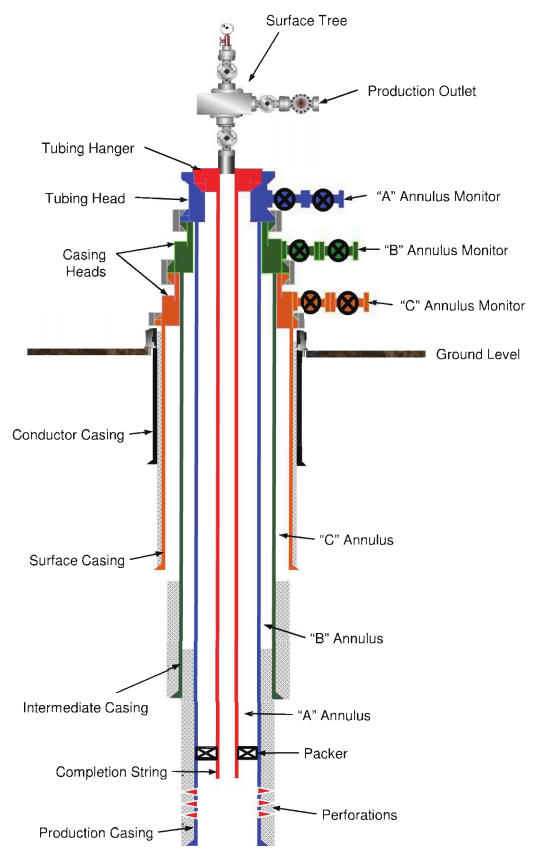

In [651]:
# Cargamos la visualizacion del pozo
urllib.request.urlretrieve("https://github.com/diegojeda/Integridad/blob/main/Pozo.PNG")
Image.open("Pozo.PNG")

En anular C tiene formacion expuesta por debajo del zapato del Casing de 13 3/8"

In [652]:
Tubulares

,Descripcion,Profundidad,Yield,Colapso,Tope De Cemento,Formacion Expuesta,Profundidad Zona Expuesta,Gradiente Fractura
Tubular,,,,,,,,
Tubing,"2 7/8"" - 6.5# - L80",9000.0,10570.0,11160.0,NA,NA,NA,NA
Casing de Produccion,"5 1/2"" - 17# - P110",10000.0,10640.0,7480.0,4000,NO,NA,NA
Casing Intermedio 1,"10 3/4"" - 55.5# - P110",5000.0,8860.0,5950.0,1200,SI,1000.0,19.5
Casing Intermedio 2,"13 3/8"" - 68# - K55",1000.0,3450.0,1950.0,0,NO,NA,NA
Casing de Superficie,"18 5/8"" - 87.5# - K55",500.0,2250.0,630.0,0,NO,NA,NA


In [653]:
Anulares

,Densidad De Fluido,Presion En Superficie
Anular,,
Tubing,2.6,500.0
Anular A,13.0,240.0
Anular B,12.0,0.0
Anular C,10.0,0.0
Anular D,9.0,0.0


# 2. Evaluacion Manual De MAWOP Por Anulares
Los calculos de MAWOP (Maximum Allowable Wellhead Operating Pressure) o Maxima Presion Operativa Permitida En Superficie, se deben realizar anular por anular, evaluando los elementos que componen la envolvente, de la cual, el MAWOP sera determinado por el valor minimo de la evaluacion de los siguientes 4 componentes:
- Cabezal (Wellhead)
- Equipos de Completamiento
- Falla Por Fractura De La Formacion
- Tubulares

## 2.1 Evaluacion del Anular "A"

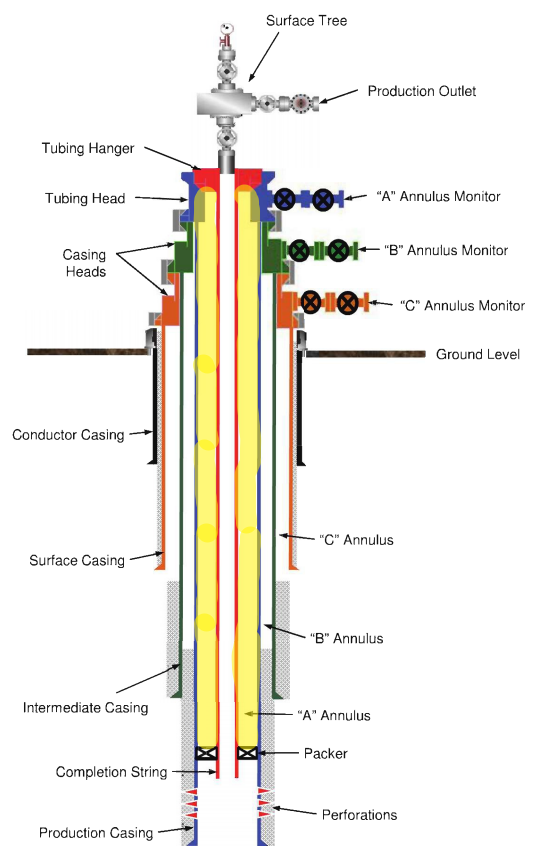

In [654]:
# Cargamos la visualizacion del Anular A
urllib.request.urlretrieve("https://github.com/diegojeda/Integridad/blob/main/Anular%20A.png")
Image.open("Anular A.png")

### 2.1.1 Wellhead
El MAWOP basado en el cabezal usaremos esta formula:

$$ Wellhead Rating = 0.8 x P_{w} $$

Donde:

$P_{w}$ se define como el valor minimo entre el Rated Working Pressure del cabezal o el valor maximo de la prueba de presion realizada al mismo luego de la instalacion.


In [655]:
WHR = 0.8*Pw
print("El MAWOP Por Cabezal Es: {0:.0f} Psi".format(WHR))
MAWOP.append(int(WHR))

El MAWOP Por Cabezal Es: 4000 Psi


### 2.1.2 Equipos de Completamiento
El MAWOP basado en los equipos de completamiento deber ser calculado para cada equipo, usando la siguiente formula:

$$ Completion Equipment Rating Component = 0.8 x (P_{cc} - \Delta P_{cc}) $$

Donde:

$P_{cc}$ Es el rated working pressure del equipo.

$\Delta P_{cc}$ Es la presion diferencial a traves del equipo de completamiento calculada a la profunidad donde esta ubicado el equipo.

#### 2.1.2.1 Empaque
Procederemos a calcular la presion hidrostatica por encima del empaque y por debajo del empaque para estimar la presion diferencial a través de el:

In [656]:
# Presion hidrostatica por encima del empaque: Dentro del Anular A
BHP_T = (Anulares.iloc[1]["Presion En Superficie"]) + 0.052 * (Anulares.iloc[1]["Densidad De Fluido"])*(Packer["Profundidad"])

# Presion hidrostatica por debajo del empaque: dentro del tubing
BHP_B = (Anulares.iloc[0]["Presion En Superficie"]) + 0.052 * (Anulares.loc["Tubing"]["Densidad De Fluido"])*(Packer["Profundidad"])

# Evaluamos entonces el empaque
Packer_Eval = 0.8 * ( (Packer["Rating"])-(BHP_T-BHP_B) )
                     
print("El MAWOP Por Empaque Es: {0:.0f} Psi".format(Packer_Eval))
MAWOP.append(int(Packer_Eval))

El MAWOP Por Empaque Es: 4314 Psi


### 2.1.3 Presion De Falla Por Fractura De La Formacion
El MAWOP basado en la presion de falla por fractura de la formacion esta basada en el gradiente de fractura (GF) la cual puede ser determinada de una prueba de integridad de la formacion (FIT - Formation Integrity Test) o por una prueba de fuga (LOT - Leak Off Test) junto con el gradiente de lodo (MWG - Mud Weight Gradient) usado sin tener perdidas en esa seccion de hueco.

Esta presion se puede estimar con la siguiente formula:

$$ Formation Fracture Breakdown Component = 0.8 x (TVD ( GF - MWG) $$

Donde:

$TVD$ Es la profundidad vertical medida del punto debil, el cual puede ser el zapato del revestimento anterior que no este cubierto con cemento o el punto mas cercano a la superficie sin sello hidraulico.

$GF$ Es el gradiente de fractura del punto debil.

$MWG$ Es el gradiente de lodo usado en esa seccion con el cual no ocurrieron perdidas de fluidos.

*En este caso, el Anular "A" no presenta formaciones expuestas.*

### 2.1.4 Tubulares
Se usará el metodo conocido como Simple De-Rating Method (SDM), el cual se considera apropiado para los pozos donde su historia esta documentada y los indices de desgaste y corrosion no son significativos o relevantes.

1) Usando esta metodologia para los tubulares internos y externos, el MAWOP basado en los tubulares para un anular dado será el menor de los siguientes valores:
    - 50% del MYIP (Minimum Internal Yield Pressure) del tubular que esta siendo evaluado.
    - 75% del MCP (Minimum Collapse Pressure) del tubular interno.
    - 80% MIYP del siguiente tubular externo a ser evaluado.


2) Para el tubular mas externo al que podria contener presión (por lo general el casing de superfice) el MAWOP será el menor de los siguientes valores:
    - 30% del MIYP del tubular evaluado.
    - 75% del MCP del tubular interno.

#### 2.1.4.1 Anular A

In [657]:
# Evaluacion del tubular a analizar: 5 1/2" Casing
Tub_ev = 0.5 * ( Tubulares.iloc[2]["Yield"] )

# Evaluacion del tubular interno: 2 7/8" Tubing
Tub_in = 0.75 * ( Tubulares.iloc[1]["Colapso"] )

# Evaluacion del tubular externo: 10 3/4" Casing
Tub_out = 0.8 * ( Tubulares.iloc[3]["Colapso"] )

print("La Evaluacion Del Tubular Actual {0} Es: {1:.0f} Psi".format(Tubulares.loc["Casing de Produccion"]["Descripcion"],Tub_ev))
print("La Evaluacion Del Tubular Interno {0} Es: {1:.0f} Psi".format(Tubulares.loc["Tubing"]["Descripcion"],Tub_in))
print("La Evaluacion Del Tubular Externo {0} Es: {1:.0f} Psi".format(Tubulares.loc["Casing Intermedio 1"]["Descripcion"],Tub_out))

list_tub = [Tub_ev,Tub_in,Tub_out]
print("\nEl MAWOP Por Tubulares Es: {0:.0f} Psi".format(min(list_tub)))
MAWOP.append(int(min(list_tub)))

La Evaluacion Del Tubular Actual 5 1/2" - 17# - P110 Es: 4430 Psi
La Evaluacion Del Tubular Interno 2 7/8" - 6.5# - L80 Es: 5610 Psi
La Evaluacion Del Tubular Externo 10 3/4" - 55.5# - P110 Es: 1560 Psi

El MAWOP Por Tubulares Es: 1560 Psi


# 3. Evaluacion Automatica De MAWOP Por Anulares

## 3.1 Definicion De Funciones Automaticas De Calculo

### 3.1.1 Funcion MAWOP Cabezal

In [658]:
def MAWOP_WH(HW_Rating):
    '''
    Funcion que calcula el MAWOP basado en el RWP del cabezal.
    
    - HW_Rating: Rated Working Pressure del cabezal    
    
    '''
    
    MAWOP_WH = int(0.8 * HW_Rating)
    print("El MAWOP Por Cabezal Es: {0:.0f} Psi".format(MAWOP_WH))
    return MAWOP_WH

### 3.1.2 Funcion MAWOP Equipos De Completamiento

In [659]:
def MAWOP_Com_Eq(Equipo,Anulares,Anular_in,Anular_out):
    '''
    Funcion que Calcula el MAWOP basando en un equipo del completamiento
    
    - Equipo: Diccionario con la Profundidad del Equipo (TVD) y el RWP del mismo.
    - Anulares: Dataframe con los datos de los datos de las densidades
    - Anular_in: String con el nombre del anular interno del equipo de completamiento.
    - Anular_out: String con el nombre del anular externo del equipo de completamiento.
    '''
    
    # Presion hidrostatica por encima del empaque: Dentro del Anular A
    BHP_T = (Anulares.loc[Anular_out]["Presion En Superficie"]) + 0.052 * (Anulares.loc[Anular_out]["Densidad De Fluido"])*(Equipo["Profundidad"])

    # Presion hidrostatica por debajo del empaque: dentro del tubing
    BHP_B = (Anulares.loc[Anular_in]["Presion En Superficie"]) + 0.052 * (Anulares.loc[Anular_in]["Densidad De Fluido"])*(Equipo["Profundidad"])

    # Evaluamos entonces el empaque
    Equipo_Eval = int( 0.8 * ( (Equipo["Rating"])-(BHP_T-BHP_B) ) )

    print("El MAWOP Por Empaque Es: {0:.0f} Psi".format(Equipo_Eval))
    
    return(Equipo_Eval)

### 3.1.3 Funcion MAWOP Fractura De Formacion

In [660]:
def MAWOP_For(Tubulares,Anulares, Anular_Eval):
    
    ident = Anulares.index.get_loc(Anular_Eval)-1
    
    if Tubulares["Formacion Expuesta"][ident]=="SI":
        MAWOP_For = int( 0.8 * (Tubulares["Profundidad Zona Expuesta"][ident] * ( Tubulares["Gradiente Fractura"][ident] - Anulares.loc["Anular C"]["Densidad De Fluido"])))
        print("El MAWOP Por Fractura De Formacion Es: {0:.0f} Psi".format(MAWOP_For))
    else:
        print("No Tienes Formaciones Expuestas")

### 3.1.4 Funcion MAWOP Tubulares

In [661]:
def MAWOP_Tub(Anulares,Tubulares,Anular_Eval):
    '''
    Funcion que calcula el MAWOP basado en la fractura de la formacion expuesta, si la hay
    
    - Anulares: Dataframe con los datos de presion y densidad de los anulares
    - Tubulares: Dataframe con los datos de las bases de los tubulares y los topes de cemento.
    - Anular_Eval: String con el nombre del anular a evaluar.
    
    '''
    
    ident = Anulares.index.get_loc(Anular_Eval)
    
    if ident < len(Tubulares)-1:
        
        # Evaluacion del tubular a analizar: 5 1/2" Casing
        Tub_ev = 0.5 * ( Tubulares.iloc[ident]["Yield"] )

        # Evaluacion del tubular interno: 2 7/8" Tubing
        Tub_in = 0.75 * ( Tubulares.iloc[ident-1]["Colapso"] )

        # Evaluacion del tubular externo: 10 3/4" Casing
        Tub_out = 0.8 * ( Tubulares.iloc[ident+1]["Colapso"] )

        list_tub = [Tub_ev,Tub_in,Tub_out]
        
        print("La Evaluacion Del Tubular Actual {0} Es: {1:.0f} Psi".format(Tubulares.iloc[ident]["Descripcion"],Tub_ev))
        print("La Evaluacion Del Tubular Interno {0} Es: {1:.0f} Psi".format(Tubulares.iloc[ident-1]["Descripcion"],Tub_in))
        print("La Evaluacion Del Tubular Externo {0} Es: {1:.0f} Psi".format(Tubulares.iloc[ident+1]["Descripcion"],Tub_out))
        
    else:
        # Evaluacion del tubular a analizar: 5 1/2" Casing
        Tub_ev = 0.3 * ( Tubulares.iloc[ident]["Yield"] )
        
        # Evaluacion del tubular interno: 2 7/8" Tubing
        Tub_in = 0.75 * ( Tubulares.iloc[ident-1]["Colapso"] )
        
        print("La Evaluacion Del Tubular Actual {0} Es: {1:.0f} Psi".format(Tubulares.iloc[ident]["Descripcion"],Tub_ev))
        print("La Evaluacion Del Tubular Interno {0} Es: {1:.0f} Psi".format(Tubulares.iloc[ident-1]["Descripcion"],Tub_in))
        
        list_tub = [Tub_ev,Tub_in]        

    print("\nEl MAWOP Por Tubulares Es: {0:.0f} Psi".format(min(list_tub)))

## 3.2 Evaluacion Anular A

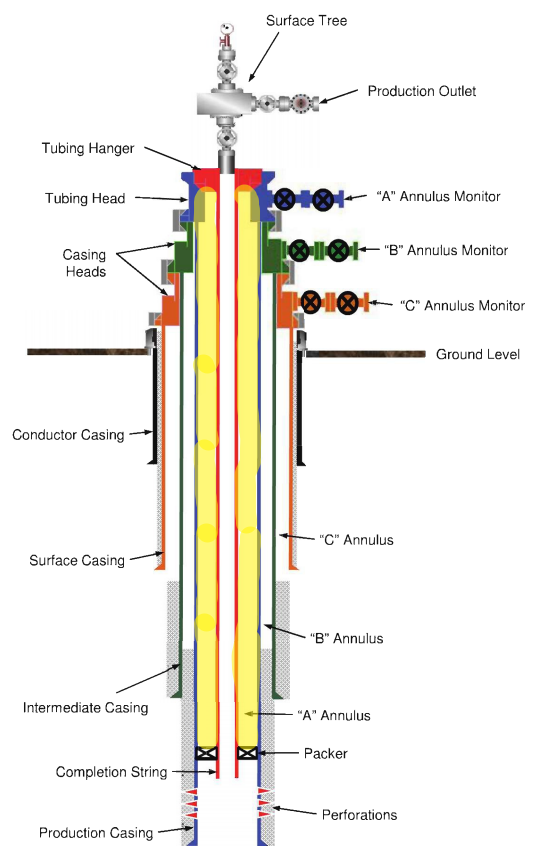

In [662]:
# Cargamos la visualizacion del Anular A
urllib.request.urlretrieve("https://github.com/diegojeda/Integridad/blob/main/Anular%20A.png")
Image.open("Anular A.png")

### 3.2.1 Wellhead

In [663]:
MAWOP_WH(Pw)

El MAWOP Por Cabezal Es: 4000 Psi


4000

### 3.2.2 Equipos De Completamiento

In [664]:
MAWOP_Com_Eq(Packer,Anulares,"Tubing","Anular A")

El MAWOP Por Empaque Es: 4314 Psi


4314

### 3.2.3 Falla Por Fractura De Formacion

In [665]:
MAWOP_For(Tubulares,Anulares, "Anular A")

No Tienes Formaciones Expuestas


### 3.2.4 Falla Por Tubulares

In [666]:
MAWOP_Tub(Anulares,Tubulares,"Anular A")

La Evaluacion Del Tubular Actual 5 1/2" - 17# - P110 Es: 5320 Psi
La Evaluacion Del Tubular Interno 2 7/8" - 6.5# - L80 Es: 8370 Psi
La Evaluacion Del Tubular Externo 10 3/4" - 55.5# - P110 Es: 4760 Psi

El MAWOP Por Tubulares Es: 4760 Psi


## 3.3 Evaluacion Anular B

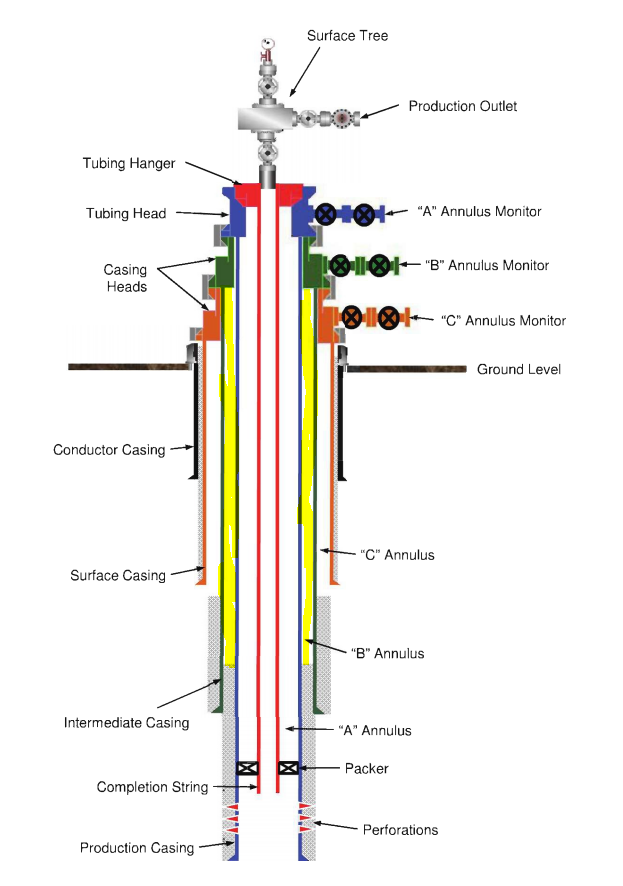

In [667]:
# Cargamos la visualizacion del Anular A
urllib.request.urlretrieve("https://github.com/diegojeda/Integridad/blob/main/Anular%20B.png")
Image.open("Anular B.png")

### 3.3.1 Wellhead

In [668]:
MAWOP_WH(Pw)

El MAWOP Por Cabezal Es: 4000 Psi


4000

### 3.3.2 Equipos De Completamiento

No hay equipos de completamiento en el Anular B

### 3.3.3 Falla Por Fractura De Formacion

In [669]:
MAWOP_For(Tubulares,Anulares, "Anular B")

No Tienes Formaciones Expuestas


### 3.3.4 Falla Por Tubulares

In [670]:
MAWOP_Tub(Anulares,Tubulares,"Anular B")

La Evaluacion Del Tubular Actual 10 3/4" - 55.5# - P110 Es: 4430 Psi
La Evaluacion Del Tubular Interno 5 1/2" - 17# - P110 Es: 5610 Psi
La Evaluacion Del Tubular Externo 13 3/8" - 68# - K55 Es: 1560 Psi

El MAWOP Por Tubulares Es: 1560 Psi


## 3.4 Evaluacion Anular C

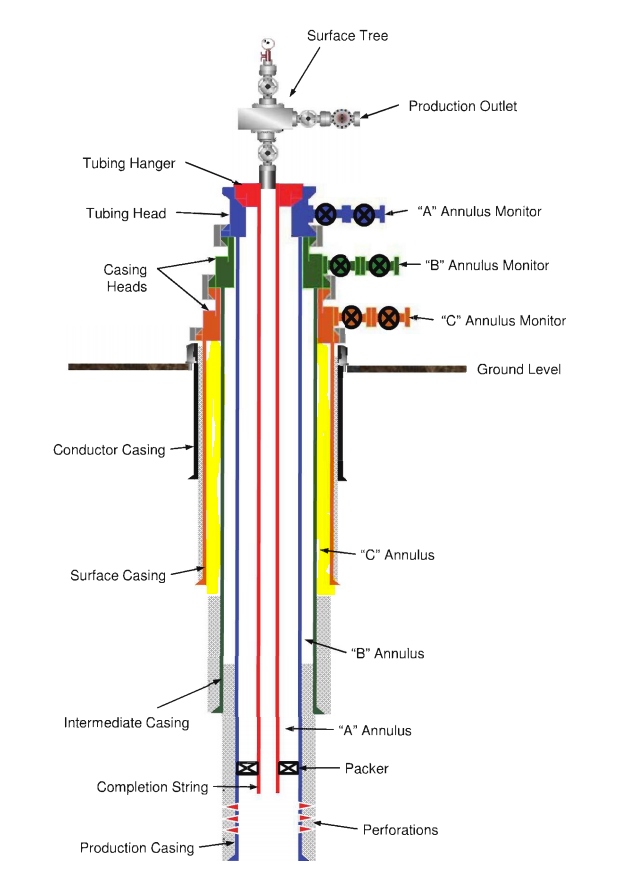

In [671]:
# Cargamos la visualizacion del Anular A
urllib.request.urlretrieve("https://github.com/diegojeda/Integridad/blob/main/Anular%20C.png")
Image.open("Anular C.png")

### 3.4.1 Wellhead

In [672]:
MAWOP_WH(Pw)

El MAWOP Por Cabezal Es: 4000 Psi


4000

### 3.4.2 Equipos De Completamiento

No hay equipos de completamiento en el Anular C

### 3.4.3 Falla Por Fractura De Formacion

In [673]:
MAWOP_For(Tubulares,Anulares, "Anular C")

El MAWOP Por Fractura De Formacion Es: 7600 Psi


### 3.4.4 Falla Por Tubulares

In [674]:
MAWOP_Tub(Anulares,Tubulares,"Anular C")

La Evaluacion Del Tubular Actual 13 3/8" - 68# - K55 Es: 1725 Psi
La Evaluacion Del Tubular Interno 10 3/4" - 55.5# - P110 Es: 4462 Psi
La Evaluacion Del Tubular Externo 18 5/8" - 87.5# - K55 Es: 504 Psi

El MAWOP Por Tubulares Es: 504 Psi


## 3.5 Evaluacion Anular D

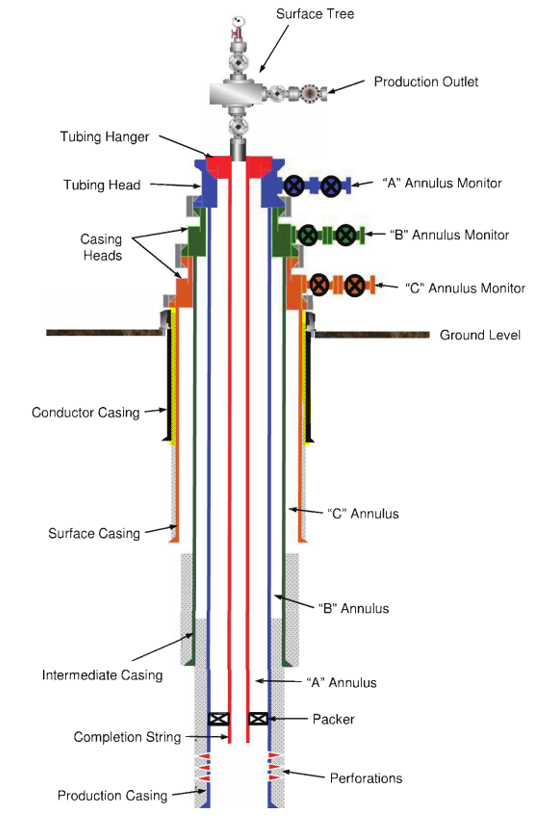

In [675]:
# Cargamos la visualizacion del Anular D
urllib.request.urlretrieve("https://github.com/diegojeda/Integridad/blob/main/Anular%20D.png")
Image.open("Anular D.png")

### 3.5.1 Wellhead

In [676]:
MAWOP_WH(Pw)

El MAWOP Por Cabezal Es: 4000 Psi


4000

### 3.5.2 Equipos De Completamiento

No hay equipos de completamiento en el Anular D

### 3.5.3 Falla Por Fractura De Formacion

In [677]:
MAWOP_For(Tubulares,Anulares, "Anular D")

No Tienes Formaciones Expuestas


### 3.5.4 Falla Por Tubulares

In [678]:
MAWOP_Tub(Anulares,Tubulares,"Anular D")

La Evaluacion Del Tubular Actual 18 5/8" - 87.5# - K55 Es: 675 Psi
La Evaluacion Del Tubular Interno 13 3/8" - 68# - K55 Es: 1462 Psi

El MAWOP Por Tubulares Es: 675 Psi
